# Sentiment Analysis

In [1]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")

[]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML
sns.set()

In [3]:
OHCO = ['artist', 'song','lines', 'token_num']
colors = 'YlGnBu'
WORDS = OHCO[:4]
LINES = OHCO[:3]
SONG = OHCO[:2]
ARTIST = OHCO[:1]

In [4]:
salex_csv = 'salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [5]:
TOKENS = pd.read_csv('tokens.csv').set_index(OHCO).sort_index()
VOCAB = pd.read_csv('vocab.csv').set_index('term_str').sort_index()
LIB = pd.read_csv('lib.csv').set_index('artist').sort_index()
BOW = pd.read_csv('bow_by_artists.csv').set_index(['artist','term_str']).sort_index()

In [6]:
BOW

n        tf     tfidf
artist          term_str                         
ADELE           92cause     1  0.000060  0.000149
                a         187  0.011307  0.001555
                able        1  0.000060  0.000113
                about      11  0.000665  0.000434
                above       4  0.000242  0.000275
...                       ...       ...       ...
WHITNEY HOUSTON yours       6  0.000334  0.000379
                yourself    3  0.000167  0.000190
                yuletide    1  0.000056  0.000192
                z           2  0.000111  0.000385
                zone        1  0.000056  0.000192

[8218 rows x 3 columns]

In [7]:
LIB['decade_id'] = LIB.decade_of_prominence.str.split(', ').str[0]

In [8]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [9]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


# ---------------------------------------------------------------
# Sentiment values associated with a subset of the VOCAB from a curated sentiment lexicon
# ----------------------------------------------------------------

In [10]:
VOCAB_SENT = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [11]:
VOCAB_SENT 

,n,p,i,n_chars,max_pos_group,max_pos,stop,porter_stem,df,idf,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
abandoned,1,0.000011,16.511907,9,VB,VBN,0,abandon,1.0,3.459432,...,0,0,1,0,1,0,1,0,0,-1
accidental,3,0.000032,14.926945,10,JJ,JJ,0,accident,1.0,3.459432,...,0,0,1,0,1,0,0,1,0,-1
ache,2,0.000021,15.511907,4,NN,NN,0,ach,1.0,3.459432,...,0,0,0,0,1,0,1,0,0,-1
achieve,2,0.000021,15.511907,7,VB,VB,0,achiev,1.0,3.459432,...,0,0,0,1,0,1,0,0,1,1
acrobat,3,0.000032,14.926945,7,NN,NN,0,acrobat,1.0,3.459432,...,0,0,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wound,6,0.000064,13.926945,5,NN,NN,0,wound,2.0,2.459432,...,0,0,1,0,1,0,1,0,0,-1
wreck,7,0.000075,13.704552,5,NN,NNP,0,wreck,1.0,3.459432,...,0,1,1,0,1,0,1,1,0,-1
yearning,1,0.000011,16.511907,8,NN,NN,0,yearn,1.0,3.459432,...,1,0,0,1,1,1,0,0,1,0


In [12]:
csv_file = 'vocab_sent.csv'
VOCAB_SENT.to_csv(csv_file)

# ----------------------------------------------------------------
# Sentiment BOW_SENT 
# ----------------------------------------------------------------

In [13]:
BOW_SENT= BOW.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [14]:
BOW_SENT

n        tf     tfidf max_pos  anger  \
artist          term_str                                           
ADELE           adore       1  0.000060  0.000209      VB    0.0   
                advance     1  0.000060  0.000209      NN    0.0   
                afraid      2  0.000121  0.000138      JJ    0.0   
                anxious     1  0.000060  0.000149      JJ    0.0   
                baby       50  0.003023  0.003439      NN    0.0   
...                        ..       ...       ...     ...    ...   
WHITNEY HOUSTON wonderful   1  0.000056  0.000137      JJ    0.0   
                words       6  0.000334  0.000379     NNS    1.0   
                wound       1  0.000056  0.000137      NN    1.0   
                yearning    1  0.000056  0.000192      NN    0.0   
                young       2  0.000111  0.000162      JJ    0.0   

                           anticipation  disgust  fear  joy  sadness  \
artist          term_str                                               
ADELE           adore               1.0      0.0   0.0  1.0      0.0   
                advance             1.0      0.0   1.0  1.0      0.0   
                afraid              0.0      0.0   1.0  0.0      0.0   
                anxious             1.0      0.0   1.0  0.0      0.0   
                baby                0.0      0.0   0.0  1.0      0.0   
...                                 ...      ...   ...  ...      ...   
WHITNEY HOUSTON wonderful           0.0      0.0   0.0  1.0      0.0   
                words               0.0      0.0   0.0  0.0      0.0   
                wound               0.0      0.0   1.0  0.0      1.0   
                yearning            1.0      0.0   0.0  1.0      0.0   
                young               1.0      0.0   0.0  1.0      0.0   

                           surprise  trust  sentiment  
artist          term_str                               
ADELE           adore           0.0    1.0        1.0  
                advance         1.0    0.0        1.0  
                afraid          0.0    0.0       -1.0  
                anxious         0.0    0.0       -1.0  
                baby            0.0    0.0        1.0  
...                             ...    ...        ...  
WHITNEY HOUSTON wonderful       1.0    1.0        1.0  
                words           0.0    0.0       -1.0  
                wound           0.0    0.0       -1.0  
                yearning        0.0    1.0        0.0  
                young           1.0    0.0        1.0  

[1157 rows x 13 columns]

In [15]:
csv_file = 'bow_sent.csv'
BOW_SENT.to_csv(csv_file)

# ----------------------------------------------------------------
# Sentiment DOC_SENT 
# ----------------------------------------------------------------

In [16]:
DOC_SENT = BOW_SENT.groupby(['artist'])[emo_cols].mean()

In [17]:
DOC_SENT 

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
artist,,,,,,,,,
ADELE,0.316583,0.281407,0.201005,0.356784,0.301508,0.341709,0.145729,0.346734,-0.175879
AMY WINEHOUSE,0.310345,0.261084,0.206897,0.334975,0.305419,0.379310,0.152709,0.310345,-0.187192
ARIANA GRANDE,0.335294,0.276471,0.205882,0.305882,0.300000,0.323529,0.152941,0.311765,-0.182353
BEYONCE,0.117647,0.352941,0.235294,0.294118,0.529412,0.235294,0.176471,0.411765,0.117647
CYNDI LAUPER,0.272727,0.363636,0.090909,0.181818,0.545455,0.090909,0.090909,0.363636,0.272727
DOLLY PARTON,0.090909,0.454545,0.090909,0.181818,0.545455,0.181818,0.272727,0.363636,0.454545
DUA LIPA,0.272727,0.181818,0.272727,0.272727,0.545455,0.363636,0.272727,0.363636,0.090909
LAURYN HILL,0.263158,0.263158,0.315789,0.421053,0.315789,0.315789,0.210526,0.315789,-0.210526
PINK,0.261905,0.214286,0.190476,0.357143,0.357143,0.452381,0.142857,0.285714,-0.119048


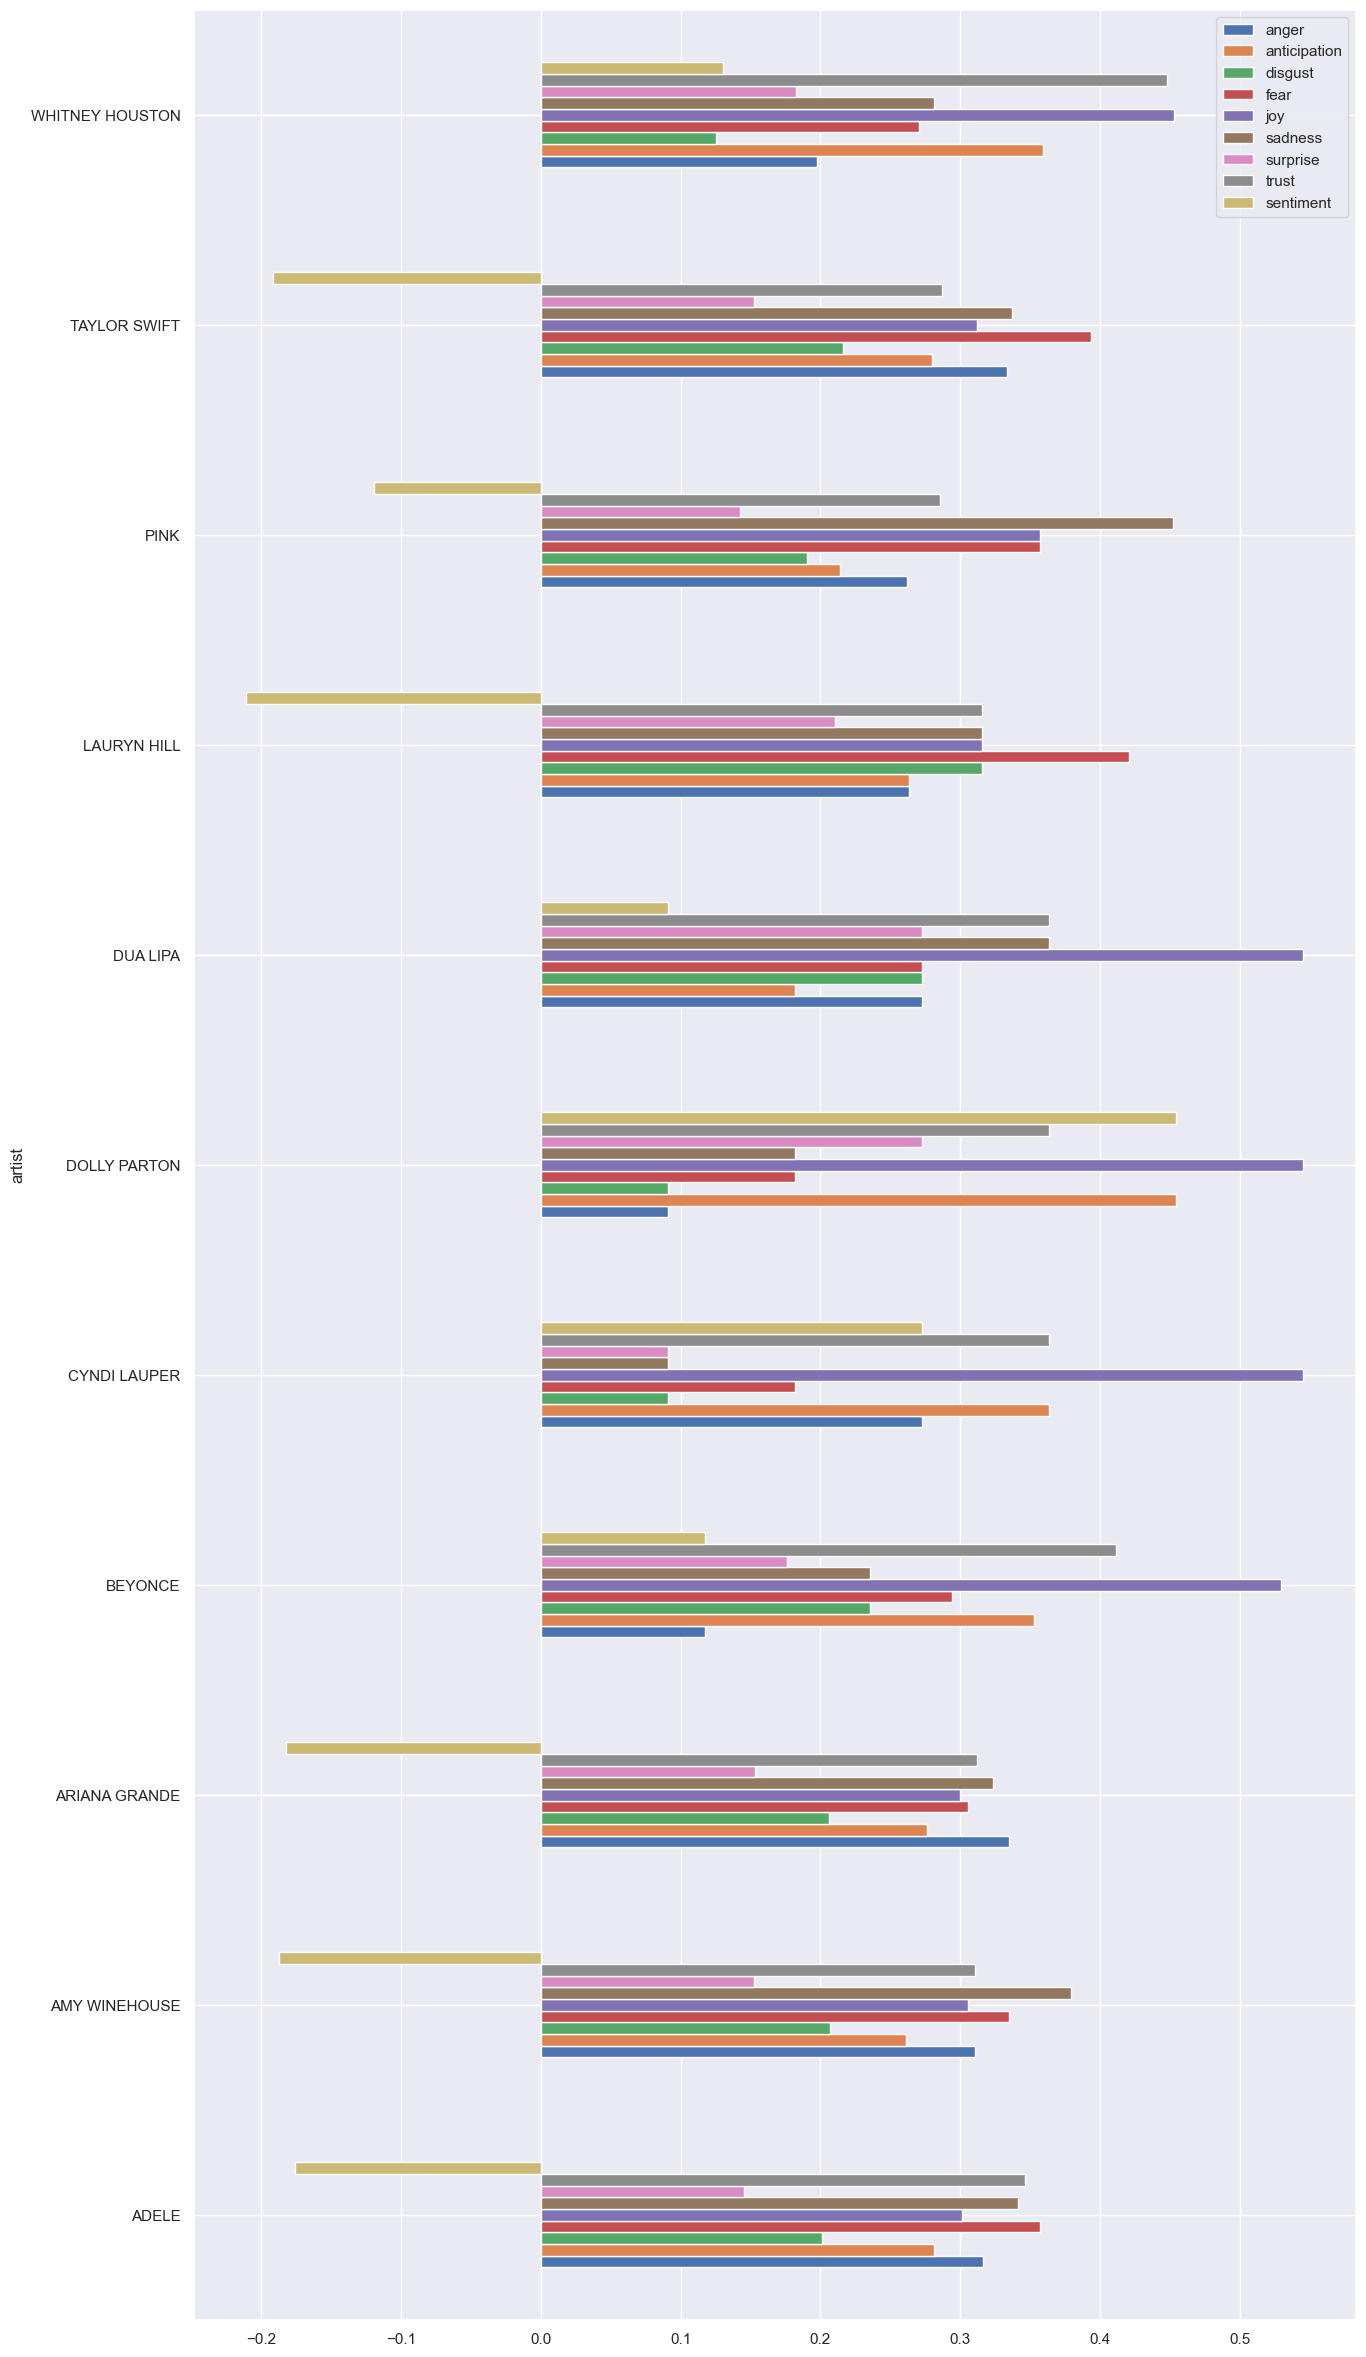

In [18]:
DOC_SENT.plot.barh(figsize=(15,30));

In [19]:
csv_file = 'doc_sent.csv'
DOC_SENT.to_csv(csv_file)

# ----------------------------------------------------------------
# Sentiment Plot
# ----------------------------------------------------------------

In [20]:
LIB

,nationality,genre,decade_of_prominence,birth_year,instruments,character_count,decade_id
artist,,,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812,2010s
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459,2000s
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008,2010s
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783,2000s
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669,1980s
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805,1970s
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067,2020s
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809,1990s
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059,2000s


In [21]:
DOC_SENT

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
artist,,,,,,,,,
ADELE,0.316583,0.281407,0.201005,0.356784,0.301508,0.341709,0.145729,0.346734,-0.175879
AMY WINEHOUSE,0.310345,0.261084,0.206897,0.334975,0.305419,0.379310,0.152709,0.310345,-0.187192
ARIANA GRANDE,0.335294,0.276471,0.205882,0.305882,0.300000,0.323529,0.152941,0.311765,-0.182353
BEYONCE,0.117647,0.352941,0.235294,0.294118,0.529412,0.235294,0.176471,0.411765,0.117647
CYNDI LAUPER,0.272727,0.363636,0.090909,0.181818,0.545455,0.090909,0.090909,0.363636,0.272727
DOLLY PARTON,0.090909,0.454545,0.090909,0.181818,0.545455,0.181818,0.272727,0.363636,0.454545
DUA LIPA,0.272727,0.181818,0.272727,0.272727,0.545455,0.363636,0.272727,0.363636,0.090909
LAURYN HILL,0.263158,0.263158,0.315789,0.421053,0.315789,0.315789,0.210526,0.315789,-0.210526
PINK,0.261905,0.214286,0.190476,0.357143,0.357143,0.452381,0.142857,0.285714,-0.119048


In [22]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(30, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

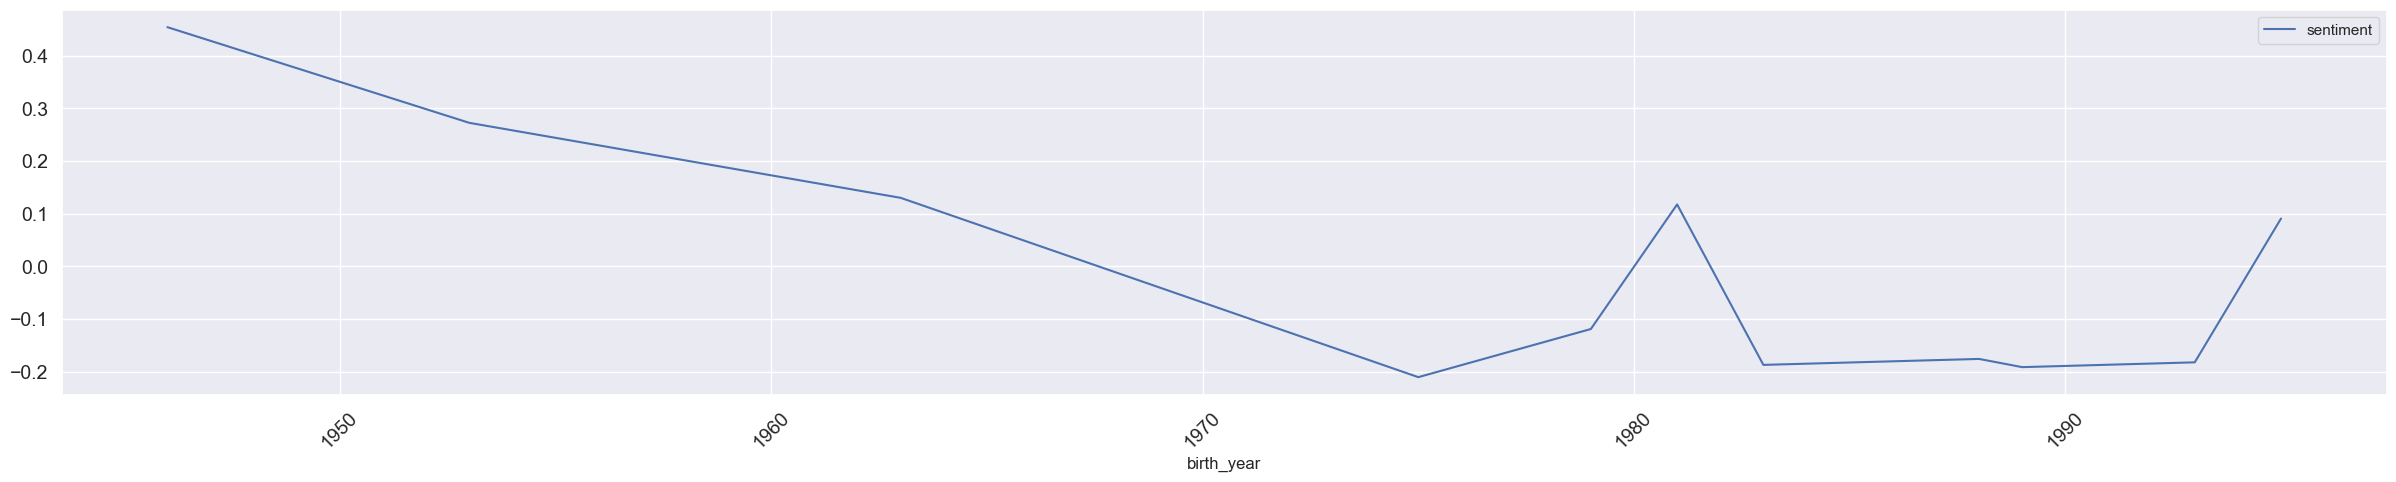

In [33]:
plot_sentiments(DEC_TIME, ['sentiment'])

In [26]:
DEC_TIME = LIB.join(DOC_SENT)
DEC_TIME

,nationality,genre,decade_of_prominence,birth_year,instruments,character_count,decade_id,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
artist,,,,,,,,,,,,,,,,
ADELE,British,"Pop, Soul",2010s,1988,"['Vocals', 'Piano']",76812,2010s,0.316583,0.281407,0.201005,0.356784,0.301508,0.341709,0.145729,0.346734,-0.175879
AMY WINEHOUSE,British,"Jazz, R&B, Soul",2000s,1983,"['Vocals', 'Guitar']",52459,2000s,0.310345,0.261084,0.206897,0.334975,0.305419,0.379310,0.152709,0.310345,-0.187192
ARIANA GRANDE,American,"Pop, R&B",2010s,1993,"['Vocals', 'Piano']",89008,2010s,0.335294,0.276471,0.205882,0.305882,0.300000,0.323529,0.152941,0.311765,-0.182353
BEYONCE,American,"Pop, R&B",2000s,1981,"['Vocals', 'Piano']",146783,2000s,0.117647,0.352941,0.235294,0.294118,0.529412,0.235294,0.176471,0.411765,0.117647
CYNDI LAUPER,American,"Pop, Rock",1980s,1953,"['Vocals', 'Guitar']",54669,1980s,0.272727,0.363636,0.090909,0.181818,0.545455,0.090909,0.090909,0.363636,0.272727
DOLLY PARTON,American,"Country, Pop",1970s,1946,"['Vocals', 'Guitar']",59805,1970s,0.090909,0.454545,0.090909,0.181818,0.545455,0.181818,0.272727,0.363636,0.454545
DUA LIPA,British,"Dance-pop, Pop",2020s,1995,['Vocals'],84067,2020s,0.272727,0.181818,0.272727,0.272727,0.545455,0.363636,0.272727,0.363636,0.090909
LAURYN HILL,American,"Hip-Hop, R&B",1990s,1975,"['Vocals', 'Guitar']",129809,1990s,0.263158,0.263158,0.315789,0.421053,0.315789,0.315789,0.210526,0.315789,-0.210526
PINK,American,"Pop, Rock",2000s,1979,"['Vocals', 'Guitar']",93059,2000s,0.261905,0.214286,0.190476,0.357143,0.357143,0.452381,0.142857,0.285714,-0.119048


In [64]:
DEC_TIME = DEC_TIME.reset_index()

In [30]:
DEC_TIME = DEC_TIME.sort_values(by = 'birth_year', ascending=True)

In [32]:
DEC_TIME = DEC_TIME.set_index('birth_year')
DEC_TIME

,nationality,genre,decade_of_prominence,instruments,character_count,decade_id,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
birth_year,,,,,,,,,,,,,,,
1946,American,"Country, Pop",1970s,"['Vocals', 'Guitar']",59805,1970s,0.090909,0.454545,0.090909,0.181818,0.545455,0.181818,0.272727,0.363636,0.454545
1953,American,"Pop, Rock",1980s,"['Vocals', 'Guitar']",54669,1980s,0.272727,0.363636,0.090909,0.181818,0.545455,0.090909,0.090909,0.363636,0.272727
1963,American,"Pop, R&B",1980s,"['Vocals', 'Piano']",84037,1980s,0.197917,0.359375,0.125000,0.270833,0.453125,0.281250,0.182292,0.447917,0.130208
1975,American,"Hip-Hop, R&B",1990s,"['Vocals', 'Guitar']",129809,1990s,0.263158,0.263158,0.315789,0.421053,0.315789,0.315789,0.210526,0.315789,-0.210526
1979,American,"Pop, Rock",2000s,"['Vocals', 'Guitar']",93059,2000s,0.261905,0.214286,0.190476,0.357143,0.357143,0.452381,0.142857,0.285714,-0.119048
1981,American,"Pop, R&B",2000s,"['Vocals', 'Piano']",146783,2000s,0.117647,0.352941,0.235294,0.294118,0.529412,0.235294,0.176471,0.411765,0.117647
1983,British,"Jazz, R&B, Soul",2000s,"['Vocals', 'Guitar']",52459,2000s,0.310345,0.261084,0.206897,0.334975,0.305419,0.379310,0.152709,0.310345,-0.187192
1988,British,"Pop, Soul",2010s,"['Vocals', 'Piano']",76812,2010s,0.316583,0.281407,0.201005,0.356784,0.301508,0.341709,0.145729,0.346734,-0.175879
1989,American,"Country, Pop",2000s,"['Vocals', 'Guitar', 'Piano']",96348,2000s,0.333333,0.280142,0.216312,0.393617,0.312057,0.336879,0.152482,0.287234,-0.191489


## WITH RESPECT TO BIRTH YEAR

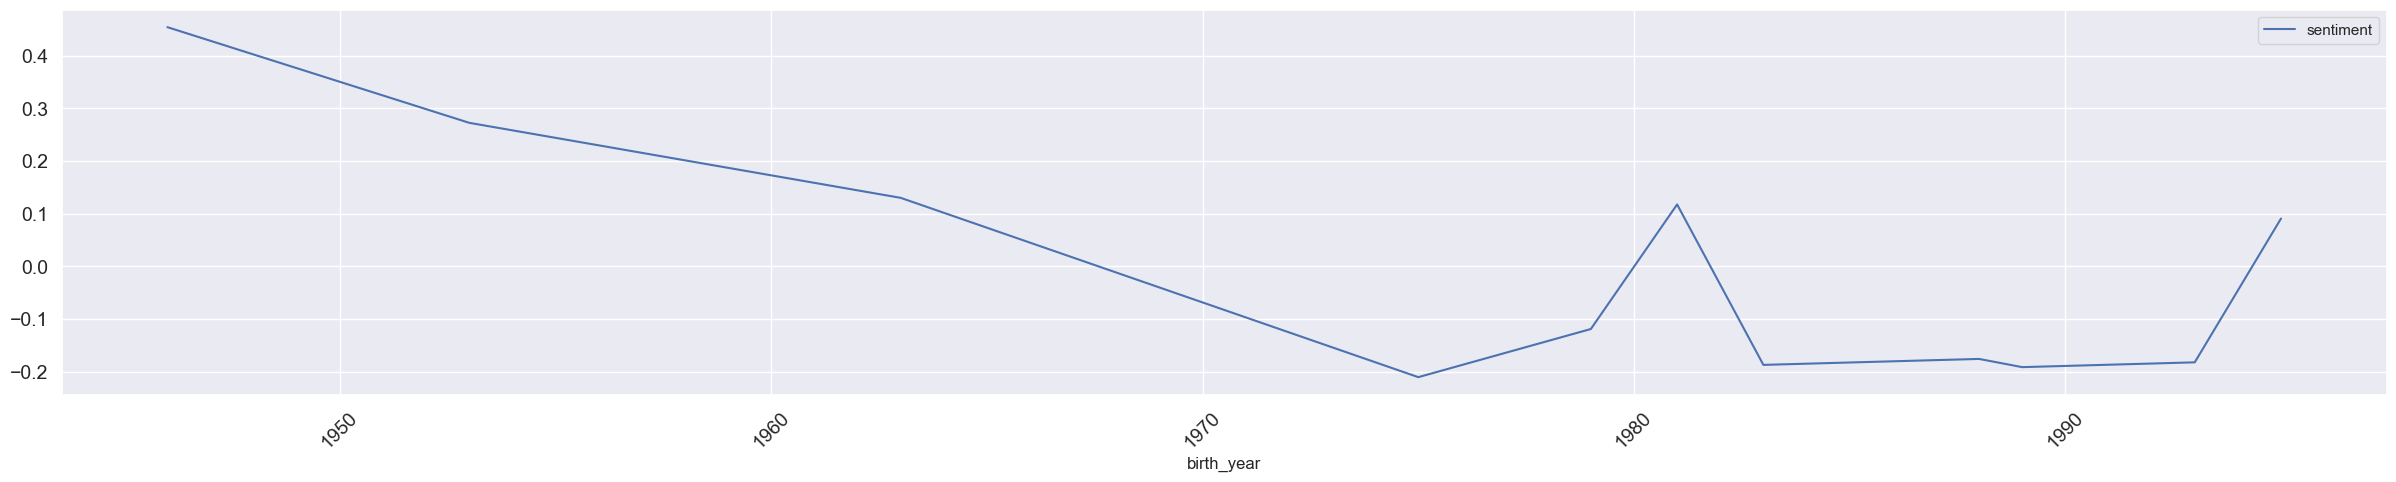

In [34]:
#WITH RESPECT TO BIRTH YEAR
plot_sentiments(DEC_TIME, ['sentiment'])

In [35]:
DEC_TIME = DEC_TIME.reset_index()
DEC_TIME

,birth_year,nationality,genre,decade_of_prominence,instruments,character_count,decade_id,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
0,1946,American,"Country, Pop",1970s,"['Vocals', 'Guitar']",59805,1970s,0.090909,0.454545,0.090909,0.181818,0.545455,0.181818,0.272727,0.363636,0.454545
1,1953,American,"Pop, Rock",1980s,"['Vocals', 'Guitar']",54669,1980s,0.272727,0.363636,0.090909,0.181818,0.545455,0.090909,0.090909,0.363636,0.272727
2,1963,American,"Pop, R&B",1980s,"['Vocals', 'Piano']",84037,1980s,0.197917,0.359375,0.125000,0.270833,0.453125,0.281250,0.182292,0.447917,0.130208
3,1975,American,"Hip-Hop, R&B",1990s,"['Vocals', 'Guitar']",129809,1990s,0.263158,0.263158,0.315789,0.421053,0.315789,0.315789,0.210526,0.315789,-0.210526
4,1979,American,"Pop, Rock",2000s,"['Vocals', 'Guitar']",93059,2000s,0.261905,0.214286,0.190476,0.357143,0.357143,0.452381,0.142857,0.285714,-0.119048
5,1981,American,"Pop, R&B",2000s,"['Vocals', 'Piano']",146783,2000s,0.117647,0.352941,0.235294,0.294118,0.529412,0.235294,0.176471,0.411765,0.117647
6,1983,British,"Jazz, R&B, Soul",2000s,"['Vocals', 'Guitar']",52459,2000s,0.310345,0.261084,0.206897,0.334975,0.305419,0.379310,0.152709,0.310345,-0.187192
7,1988,British,"Pop, Soul",2010s,"['Vocals', 'Piano']",76812,2010s,0.316583,0.281407,0.201005,0.356784,0.301508,0.341709,0.145729,0.346734,-0.175879
8,1989,American,"Country, Pop",2000s,"['Vocals', 'Guitar', 'Piano']",96348,2000s,0.333333,0.280142,0.216312,0.393617,0.312057,0.336879,0.152482,0.287234,-0.191489
9,1993,American,"Pop, R&B",2010s,"['Vocals', 'Piano']",89008,2010s,0.335294,0.276471,0.205882,0.305882,0.300000,0.323529,0.152941,0.311765,-0.182353


## WITH RESPECT TO MEAN SENTIMENT PER DECADE

In [39]:
grouped = DEC_TIME.groupby('decade_of_prominence')
mean_sentiment_per_decade = grouped['sentiment'].mean()
dec_sent = pd.DataFrame(mean_sentiment_per_decade)

In [40]:
dec_sent

,sentiment
decade_of_prominence,
1970s,0.454545
1980s,0.201468
1990s,-0.210526
2000s,-0.095021
2010s,-0.179116
2020s,0.090909


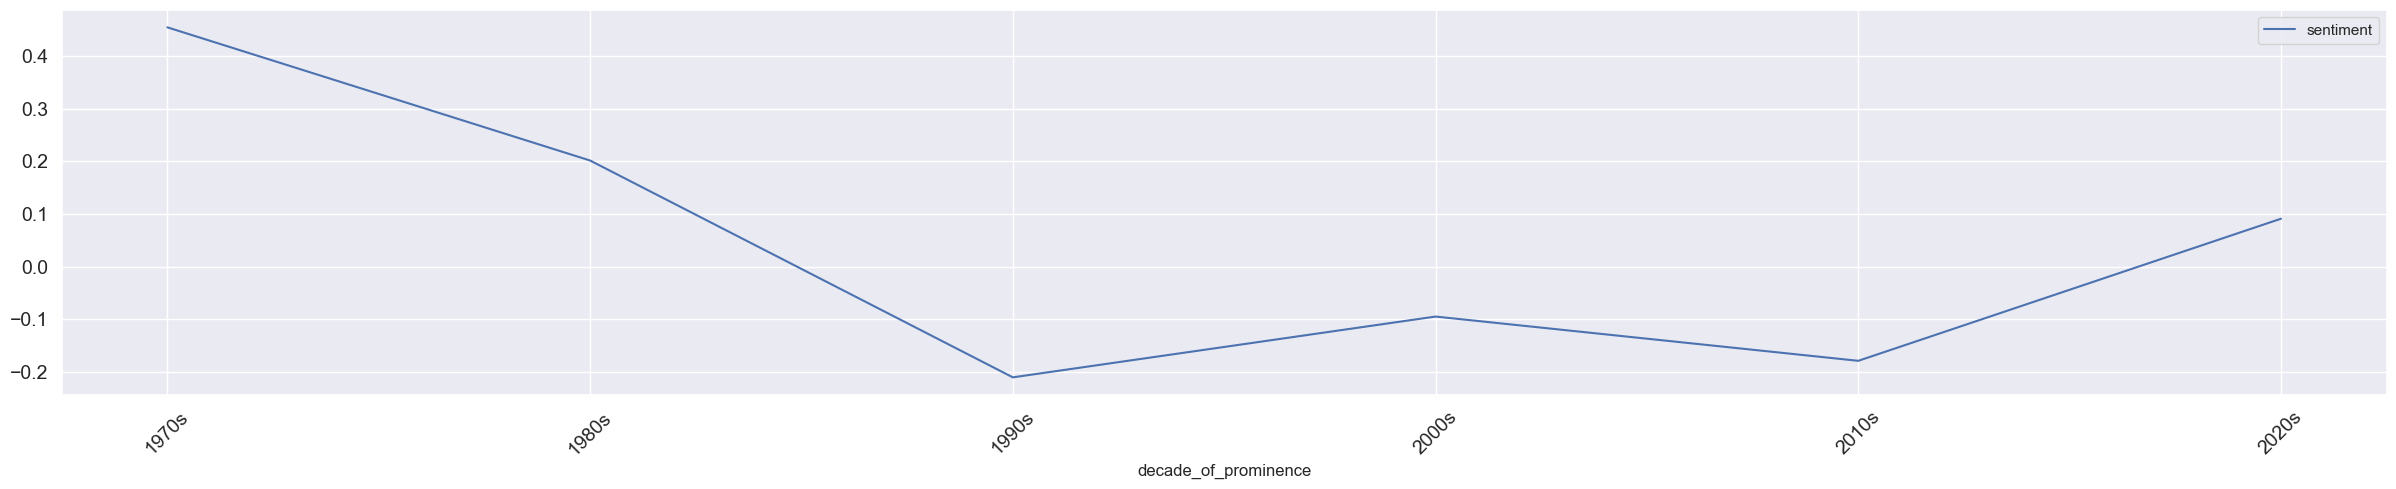

In [41]:
plot_sentiments(dec_sent, ['sentiment'])

## WITH RESPECT TO NATIONALITY

In [45]:
grouped = DEC_TIME.groupby('nationality')
mean_sentiment_by_nationality = grouped['sentiment'].mean()
nat_sent = pd.DataFrame(mean_sentiment_by_nationality)

In [46]:
nat_sent

,sentiment
nationality,
American,0.033964
British,-0.090721
